In [11]:
# List of all products
# List of orders, where each sublist contains the products ordered in that order
import pandas as pd

# Read the Excel file
df = pd.read_excel('TON-T01.-2024.xls')

char_df = df['CHARACTERISTICS'].iloc[0:953]
order_df = df['CHARACTERISTICS'].iloc[0:824]
demand_df = df['DEMAND'].iloc[0:953]
weight_df = df['WEIGHT'].iloc[0:953]
price_df = pd.to_numeric(df['Giá(/m)'].iloc[0:953], errors='coerce').fillna(0)


# Parse a specific columns into arrays
char_array = char_df.tolist()
order_array =  order_df.tolist()
demand_array = demand_df.tolist()
weight_array = weight_df.tolist()
price_array = price_df.tolist()

# Determine the number of rows and columns for the incidence matrix
rows = len(order_array)
cols = len(char_array)


# Initialize the incidence matrix with all elements set to 0
INC = [[0 for _ in range(cols)] for _ in range(rows)]


# Populate the incidence matrix based on the products ordered in each order
for i, product in enumerate(order_array):
        col_index = char_array.index(product)
        INC[i][col_index] = 1


# Print the resulting incidence matrix
for row in INC:
    print(row)


[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

JACCARD SIMILARITY - CHARACTERISTICS

In [12]:
from collections import defaultdict


def jaccard_similarity(set1, set2):
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    return intersection / union if union != 0 else 0

def name_handler(item):
    return item[:4], item[5], item[7]


def build_similarity_matrix(data):
    num_rows = len(data)    
    similarity_matrix = [[0 for _ in range(len(data))] for _ in range(num_rows)]



    # Tạo tập hợp các sản phẩm dựa trên định dạng
    product_sets = defaultdict(set)
    for item in data:
        customer_id = item[:4]
        year = item[5]
        quality_code = item[7]
        product_code = item[9:]
        product_sets[customer_id, year, quality_code].add(product_code)

    # Tính toán similarity index và xây dựng similarity matrix
    for i in range(len(data)):
        for j in range(i, len(data)):
            product1 = data[i]
            product2 = data[j]
            similarity = jaccard_similarity(product_sets[name_handler(product1)], product_sets[name_handler(product2)])
            similarity_matrix[i][j] = similarity
            similarity_matrix[j][i] = similarity
            
    # Create an empty 2D array with zeros
    # num_rows = len(data)
    
    # array = [[0 for _ in range(len(data))] for _ in range(num_rows)]

    # # Populate the array
    # i = 0
    # for key, inner_dict in similarity_matrix.items():
    #     j = 0
    #     for inner_key, value in inner_dict.items():
    #         array[i][j] = value
    #         j += 1
    #     i += 1


    return similarity_matrix

# Xây dựng similarity matrix
similarity_matrix = build_similarity_matrix(char_array)

print(len(similarity_matrix))




953


EUCLIDEAN DISTANCE - PRICE

In [13]:
import numpy as np

# We will use the Euclidean method to calculate distance
# between two prices of each pair of products
# Next, we need to scale the distance from 0 -> 1 for easily visualization

max_possible_distance = max(price_array) - min(price_array)

# Gán lại tên cho sản phẩm và giá trị
products = char_array
prices = price_array

def build_similarity_matrix_2(prices):

    n = len(prices)

    # Tạo ma trận tương đồng
    similarity_matrix = [[0] * n for _ in range(n)]

    max_possible_distance = max(prices) - min(prices)

    for i in range(n):
        for j in range(i, n):
            price1 = prices[i]
            price2 = prices[j]

            # Tính toán khoảng cách Euclidean
            distance = np.abs(price2-price1)
            
            # Chuẩn hoá khoảng cách và lấy 2 chữ số thập phân sau dấu phẩy
            similarity_point = 1 - float(format(distance / max_possible_distance, '.2f'))
            
            
            # Và gán tương đồng vào ma trận
            similarity_matrix[i][j] = similarity_point
            similarity_matrix[j][i] = similarity_point
    
    return similarity_matrix

print(build_similarity_matrix_2(prices[:20]))


[[1.0, 0.39, 0.49, 0.51, 0.37, 0.37, 0.13, 0.13, 0.86, 0.86, 0.65, 0.24, 0.24, 0.24, 0.12, 0.12, 0.12, 0.12, 0.0, 0.49], [0.39, 1.0, 0.9, 0.88, 0.98, 0.98, 0.75, 0.75, 0.53, 0.53, 0.74, 0.85, 0.85, 0.85, 0.73, 0.73, 0.73, 0.73, 0.61, 0.9], [0.49, 0.9, 1.0, 0.98, 0.88, 0.88, 0.65, 0.65, 0.63, 0.63, 0.84, 0.75, 0.75, 0.75, 0.63, 0.63, 0.63, 0.63, 0.51, 1.0], [0.51, 0.88, 0.98, 1.0, 0.86, 0.86, 0.63, 0.63, 0.65, 0.65, 0.86, 0.73, 0.73, 0.73, 0.61, 0.61, 0.61, 0.61, 0.49, 0.98], [0.37, 0.98, 0.88, 0.86, 1.0, 1.0, 0.76, 0.76, 0.52, 0.52, 0.72, 0.87, 0.87, 0.87, 0.75, 0.75, 0.75, 0.75, 0.63, 0.88], [0.37, 0.98, 0.88, 0.86, 1.0, 1.0, 0.76, 0.76, 0.52, 0.52, 0.72, 0.87, 0.87, 0.87, 0.75, 0.75, 0.75, 0.75, 0.63, 0.88], [0.13, 0.75, 0.65, 0.63, 0.76, 0.76, 1.0, 1.0, 0.28, 0.28, 0.48, 0.9, 0.9, 0.9, 0.98, 0.98, 0.98, 0.98, 0.87, 0.65], [0.13, 0.75, 0.65, 0.63, 0.76, 0.76, 1.0, 1.0, 0.28, 0.28, 0.48, 0.9, 0.9, 0.9, 0.98, 0.98, 0.98, 0.98, 0.87, 0.65], [0.86, 0.53, 0.63, 0.65, 0.52, 0.52, 0.28, 0.2

RUN ABC CLASSIFICATION BASED ON DEMAND & CLUSTERING BASED ON DEMAND AND CHARACTERISTIC

Clustering results for class A:
Sản phẩm 0702 SQ1002 (demand 45751.26, weight 16012.940999999999) thuộc cluster 15
Sản phẩm 0702 SQ1022 (demand 80319.0, weight 26103.675) thuộc cluster 8
Sản phẩm 0702 SQ1022 (demand 44686.0, weight 14522.95) thuộc cluster 6
Sản phẩm 0702 SQ1022 (demand 110932.0, weight 36052.9) thuộc cluster 1
Sản phẩm 0702 SQ1022 (demand 82425.0, weight 26788.125) thuộc cluster 8
Sản phẩm 0702 SQ1022 (demand 59623.0, weight 19377.475000000002) thuộc cluster 12
Sản phẩm 0702 SQ1022 (demand 22506.0, weight 7314.45) thuộc cluster 14
Sản phẩm 0702 SQ1022 (demand 84720.0, weight 27534) thuộc cluster 18
Sản phẩm 0702 SQ1022 (demand 40998.0, weight 13324.35) thuộc cluster 19
Sản phẩm 0702 SQ1022 (demand 32358.0, weight 10516.35) thuộc cluster 5
Sản phẩm 0702 SQ3653 (demand 15067.5, weight 6780.375) thuộc cluster 7
Sản phẩm 0702 SQ4153 (demand 15882.0, weight 2954.052) thuộc cluster 7
Sản phẩm 0702 SQ4661 (demand 31574.0, weight 6819.9839999999995) thuộc cluster 5
Sản phẩm 07

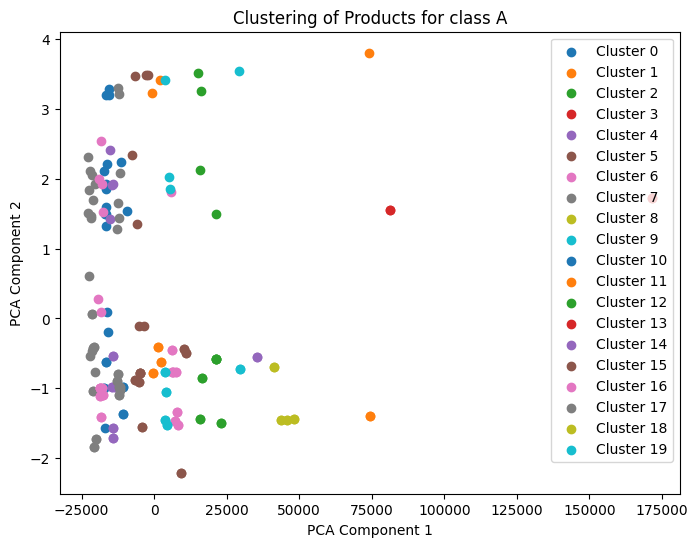

Clustering results for class B:
Sản phẩm 0595 SQ1012 (demand 5144.0, weight 1543.2) thuộc cluster 19
Sản phẩm 0702 SQ1002 (demand 8336.6, weight 2917.81) thuộc cluster 0
Sản phẩm 0702 SQ1002 (demand 8986.0, weight 3145.1) thuộc cluster 9
Sản phẩm 0702 SQ1017 (demand 9710.0, weight 2913) thuộc cluster 4
Sản phẩm 0702 SQ1022 (demand 10884.0, weight 3537.3) thuộc cluster 5
Sản phẩm 0702 SQ2896 (demand 9123.0, weight 2732.3385) thuộc cluster 9
Sản phẩm 0702 SQ4153 (demand 4472.0, weight 831.792) thuộc cluster 16
Sản phẩm 0702 TQ4153 (demand 5290.0, weight 983.9399999999999) thuộc cluster 19
Sản phẩm 0702 SQ4661 (demand 11388.0, weight 2459.808) thuộc cluster 5
Sản phẩm 0702 SQ4661 (demand 7764.5, weight 1677.132) thuộc cluster 10
Sản phẩm 0702 SQ4661 (demand 12796.0, weight 2763.936) thuộc cluster 2
Sản phẩm 0702 SQ4681 (demand 11329.0, weight 4169.072) thuộc cluster 5
Sản phẩm 0702 SQ4681 (demand 4963.0, weight 1826.384) thuộc cluster 1
Sản phẩm 0702 SQ4681 (demand 7651.0, weight 2815.567

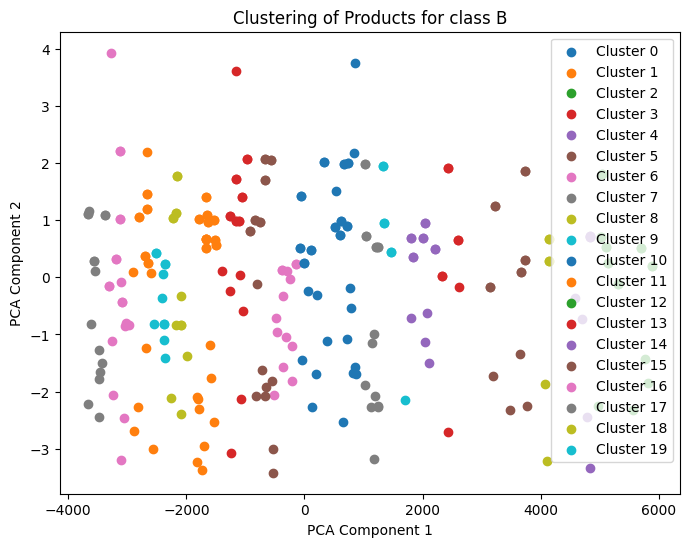

Clustering results for class C:
Sản phẩm 0595 SA4154 (demand 2848.5, weight 569.7) thuộc cluster 12
Sản phẩm K595 SQ1017 (demand 10.0, weight 3) thuộc cluster 2
Sản phẩm 0595 SQ1964 (demand 1648.0, weight 453.20000000000005) thuộc cluster 11
Sản phẩm 0595 SL4155 (demand 3111.0, weight 622.2) thuộc cluster 16
Sản phẩm 0595 SL4155 (demand 651.0, weight 130.20000000000002) thuộc cluster 18
Sản phẩm 0595 SL4156 (demand 981.8, weight 220.905) thuộc cluster 0
Sản phẩm 0595 TL4156 (demand 1526.4, weight 343.44000000000005) thuộc cluster 11
Sản phẩm 0595 SL5509 (demand 54.0, weight 14.850000000000001) thuộc cluster 2
Sản phẩm 0595 SD4820 (demand 300.0, weight 82.5) thuộc cluster 8
Sản phẩm 0598 SJ5097 (demand 38.4, weight 8.64) thuộc cluster 2
Sản phẩm 0702 SQ1002 (demand 782.1, weight 175.9725) thuộc cluster 10
Sản phẩm K702 SQ1002 (demand 45.0, weight 10.125) thuộc cluster 2
Sản phẩm K702 SQ1002 (demand 20.0, weight 4.5) thuộc cluster 2
Sản phẩm K702 SQ1002 (demand 512.0, weight 179.2) thuộc

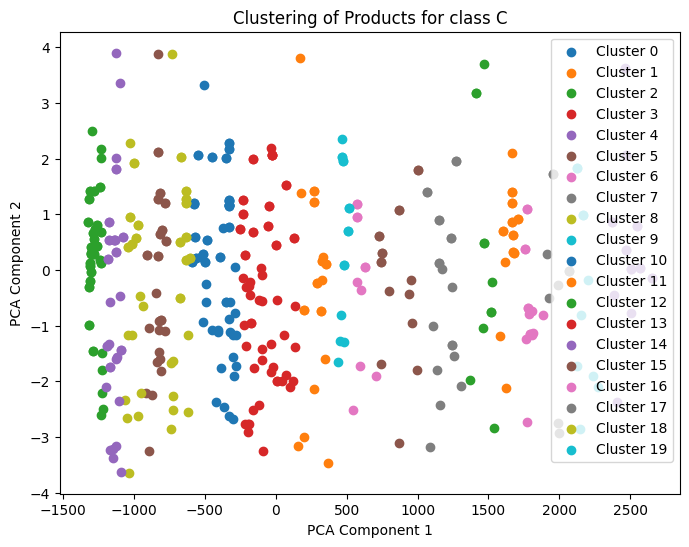

Results for class A:
Product: 0702 SQ1002, Demand: 45751.26, Weight: 16012.940999999999, Cluster: 15
Product: 0702 SQ1022, Demand: 80319.0, Weight: 26103.675, Cluster: 8
Product: 0702 SQ1022, Demand: 44686.0, Weight: 14522.95, Cluster: 6
Product: 0702 SQ1022, Demand: 110932.0, Weight: 36052.9, Cluster: 1
Product: 0702 SQ1022, Demand: 82425.0, Weight: 26788.125, Cluster: 8
Product: 0702 SQ1022, Demand: 59623.0, Weight: 19377.475000000002, Cluster: 12
Product: 0702 SQ1022, Demand: 22506.0, Weight: 7314.45, Cluster: 14
Product: 0702 SQ1022, Demand: 84720.0, Weight: 27534, Cluster: 18
Product: 0702 SQ1022, Demand: 40998.0, Weight: 13324.35, Cluster: 19
Product: 0702 SQ1022, Demand: 32358.0, Weight: 10516.35, Cluster: 5
Product: 0702 SQ3653, Demand: 15067.5, Weight: 6780.375, Cluster: 7
Product: 0702 SQ4153, Demand: 15882.0, Weight: 2954.052, Cluster: 7
Product: 0702 SQ4661, Demand: 31574.0, Weight: 6819.9839999999995, Cluster: 5
Product: 0702 SQ4681, Demand: 72225.0, Weight: 26578.8, Clust

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Calculate demand quantiles for ABC classification
demand_quantiles = np.percentile(demand_df, [50, 80])

# Assign ABC classes based on demand
classes = []
for demand in demand_df:
    if demand <= demand_quantiles[0]:
        classes.append('C')
    elif demand <= demand_quantiles[1]:
        classes.append('B')
    else:
        classes.append('A')

# Encode classes
label_encoder = LabelEncoder()
encoded_classes = label_encoder.fit_transform(classes)

# Create dictionaries to store clustering results for each class
class_results = {'A': [], 'B': [], 'C': []}

# Tạo một đối tượng CountVectorizer để mã hoá các sản phẩm thành vector số học
vectorizer = CountVectorizer(analyzer='char', ngram_range=(1, 1))
X_text = vectorizer.fit_transform(char_df)

# Chuyển đổi ma trận sparse thành mảng numpy
X_text = X_text.toarray()

# Chuyển đổi classes thành numpy array
X_classes = np.array(encoded_classes).reshape(-1, 1)
X_demands = np.array(demand_df).reshape(-1, 1)

# Kết hợp các features lại với nhau
X = np.hstack((X_text, X_classes, X_demands))

# Số lượng cluster bạn muốn tạo
num_clusters = 20

# Perform clustering and draw charts for each class separately
for class_label in np.unique(encoded_classes):
    class_indices = np.where(encoded_classes == class_label)[0]
    X_class = X[class_indices]

    # Áp dụng thuật toán K-means
    kmeans = KMeans(n_clusters=num_clusters, random_state=36)
    kmeans.fit(X_class)

    for i, label in zip(class_indices, kmeans.labels_):
        class_results[label_encoder.inverse_transform([class_label])[0]].append((char_df[i], demand_df[i], weight_df[i], label))
        
    # Print clustering results for each product within the class
    print(f"Clustering results for class {label_encoder.inverse_transform([class_label])[0]}:")
    for i, label in zip(class_indices, kmeans.labels_):
        print(f"Sản phẩm {char_df[i]} (demand {demand_df[i]}, weight {weight_df[i]}) thuộc cluster {label}")

    # Reduce the dimensionality of the feature space to 2 dimensions using PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_class)
    
    # Plot the clusters
    plt.figure(figsize=(8, 6))
    for i in range(num_clusters):
        plt.scatter(X_pca[kmeans.labels_ == i, 0], X_pca[kmeans.labels_ == i, 1], label=f'Cluster {i}')
    plt.title(f'Clustering of Products for class {label_encoder.inverse_transform([class_label])[0]}')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.legend()
    plt.show()
        
    
# Return results for each class
for class_label, results in class_results.items():
    print(f"Results for class {class_label}:")
    for product_name, demand, weight, cluster_label in results:
        print(f"Product: {product_name}, Demand: {demand}, Weight: {weight}, Cluster: {cluster_label}")



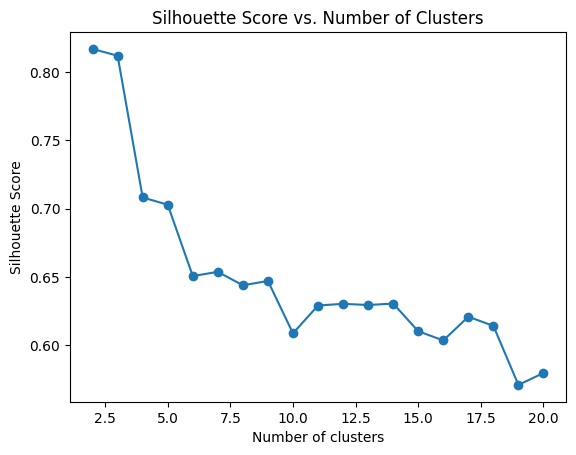

In [15]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

cluster_range = range(2, 21)
silhouette_scores = []

# Calculate silhouette score for each cluster number
for num_clusters in cluster_range:
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(X)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

# Plot silhouette scores
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.show()

In [17]:
import pandas as pd

# Assuming you have already run the provided code and generated the class_results dictionary

# Access the results for class A
results_class_A = class_results['A']

# Filter products belonging to cluster 1
cluster_1_products = [(product_name, demand, weight) for product_name, demand, weight, cluster_label in results_class_A if cluster_label == 2]

# Convert the filtered products to a list of dictionaries
data = [{'Product': product_name, 'Demand': demand, 'Weight': weight} for product_name, demand, weight in cluster_1_products]

# Create a DataFrame from the list of dictionaries
class_a_cluster_1_df = pd.DataFrame(data)

# Print the DataFrame
print(len(class_a_cluster_1_df))

class_a_cluster_1_demand_values_df = class_a_cluster_1_df['Demand']
class_a_cluster_1_weight_values_df = class_a_cluster_1_df['Weight'].apply(pd.to_numeric, errors='coerce')
class_a_cluster_1_weight_values_df.fillna(0, inplace=True)
class_a_cluster_1_product_values_df = class_a_cluster_1_df['Product']

print(class_a_cluster_1_demand_values_df.values)
print(class_a_cluster_1_weight_values_df.values)


7
[52357.3 53131.  52357.3 53131.  52542.9 52763.6 51870.3]
[20314.6324   19536.2687   20314.6324   19536.2687   13009.096611
     0.           0.      ]


RUN LP MODEL TO ARRANGE PRODUCT

In [21]:
import pulp
rsj_df = pd.read_excel('TON-T01.-2024.xls', sheet_name='Distance', names=['slot', 'rs'])
djl_df = pd.read_excel('Distancematrix.xlsx', index_col=0)

djl_df.columns = djl_df.iloc[0]
djl_df = djl_df.iloc[1:]

sub_djl = djl_df[:len(class_a_cluster_1_df)].values
djl_values = djl_df.iloc[:len(class_a_cluster_1_df), :len(class_a_cluster_1_df)].values

slots = rsj_df.iloc[:len(class_a_cluster_1_df), 0].values

rsj = rsj_df.iloc[:len(class_a_cluster_1_df), 1].values
djl = [list(row) for row in djl_values]

Q = len(class_a_cluster_1_df)
P = len(class_a_cluster_1_df)

Si = [1 for _ in range(len(class_a_cluster_1_df))]

ysik = build_similarity_matrix_2(class_a_cluster_1_demand_values_df.values)

fi = list(class_a_cluster_1_demand_values_df.values)

ywik = build_similarity_matrix_2(class_a_cluster_1_weight_values_df.values)

ycik = build_similarity_matrix(class_a_cluster_1_product_values_df.values)

print(ywik)
print(ysik)
    
optimal_solution_found = False
x = []
for i in range(Q):
    x.append([])
    for j in range(P):
        x[i].append(0)    # Assign to all value is 0
model = pulp.LpProblem("Storage_Location_Assignment", pulp.LpMinimize)
xij = {}
for i in range(Q):
    for j in range(P):
        xij[(i, j)] = pulp.LpVariable(f'x_{i}_{j}', 0, 1, pulp.LpBinary)

# Define auxiliary variables for the linearizatioxn
a = {}
for i in range(Q):
    for j in range(P):
        for k in range(Q):
            for l in range(P):
                a[(i, j, k, l)] = pulp.LpVariable(f'a_{i}_{j}_{k}_{l}', 0, 1, pulp.LpBinary)
objective = pulp.lpSum(
    fi[i] * rsj[j] * xij[(i, j)]
    for i in range(Q) for j in range(P)
)
for i in range(Q):
    for j in range(P):
        for k in range(Q):
            for l in range(P):
                objective += fi[i] * ysik[i][k] * ywik[i][k] * ycik[i][k] * djl[j][l] * a[(i, j, k, l)]

model.objective = objective
# Constraints
for i in range(Q):
    model += pulp.lpSum(xij[(i, j)] for j in range(P)) == Si[i]

for j in range(P):
    model += pulp.lpSum(xij[(i, j)] for i in range(Q)) == 1

model += pulp.lpSum(Si[i] for i in range(Q)) <= P
for i in range(Q):
    for j in range(P):
        for k in range(Q):
            for l in range(P):
                model += a[(i, j, k, l)] >= xij[(i, j)] + xij[(k, l)] - 1
                model += a[(i, j, k, l)] <= xij[(i, j)]
                model += a[(i, j, k, l)] <= xij[(k, l)]

model.solve(pulp.PULP_CBC_CMD(timeLimit=300, threads=5))

[[1.0, 0.96, 1.0, 0.96, 0.64, 0.0, 0.0], [0.96, 1.0, 0.96, 1.0, 0.6799999999999999, 0.040000000000000036, 0.040000000000000036], [1.0, 0.96, 1.0, 0.96, 0.64, 0.0, 0.0], [0.96, 1.0, 0.96, 1.0, 0.6799999999999999, 0.040000000000000036, 0.040000000000000036], [0.64, 0.6799999999999999, 0.64, 0.6799999999999999, 1.0, 0.36, 0.36], [0.0, 0.040000000000000036, 0.0, 0.040000000000000036, 0.36, 1.0, 1.0], [0.0, 0.040000000000000036, 0.0, 0.040000000000000036, 0.36, 1.0, 1.0]]
[[1.0, 0.39, 1.0, 0.39, 0.85, 0.6799999999999999, 0.61], [0.39, 1.0, 0.39, 1.0, 0.53, 0.71, 0.0], [1.0, 0.39, 1.0, 0.39, 0.85, 0.6799999999999999, 0.61], [0.39, 1.0, 0.39, 1.0, 0.53, 0.71, 0.0], [0.85, 0.53, 0.85, 0.53, 1.0, 0.8200000000000001, 0.47], [0.6799999999999999, 0.71, 0.6799999999999999, 0.71, 0.8200000000000001, 1.0, 0.29000000000000004], [0.61, 0.0, 0.61, 0.0, 0.47, 0.29000000000000004, 1.0]]
Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/kienvo/Library/Python/3

1

In [22]:
if pulp.LpStatus[model.status] == "Optimal":
    optimal_solution_found = True
    for i in range(Q):
        for j in range(P):
            if pulp.value(xij[(i, j)]) == 1:
                x[i][j] = 1
else:
    optimal_solution_found = False

In [23]:
# Print each slot and the products assigned to it
if not optimal_solution_found:
    print("No optimal solution found")
else:
    for j in range(P):
        print(f"Slot {slots[j]}: ", end="")
        for i in range(Q):
            if x[i][j] == 1:
                print(f"Product {i + 1}", end=" ")
        print()

Slot 1A1: Product 5 
Slot 1A2: Product 2 
Slot 1A3: Product 6 
Slot 1A4: Product 4 
Slot 1B1: Product 7 
Slot 1B2: Product 1 
Slot 1B3: Product 3 
